In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch3 Logistic Regression/advertising.csv'
data = pd.read_csv(data_path)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [ ]:
# 데이터 전처리
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
data['City'].nunique()

969

In [ ]:
data['Ad Topic Line'].nunique()

1000

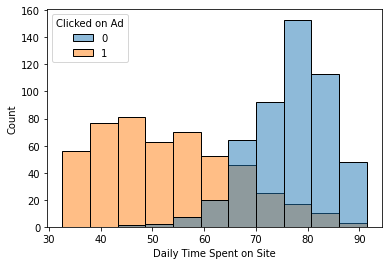

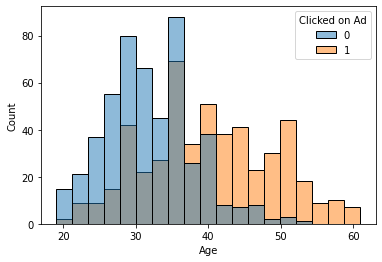

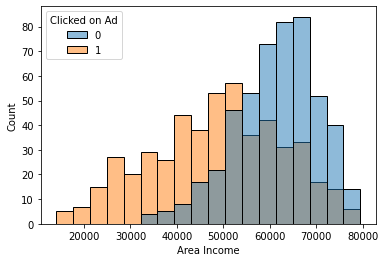

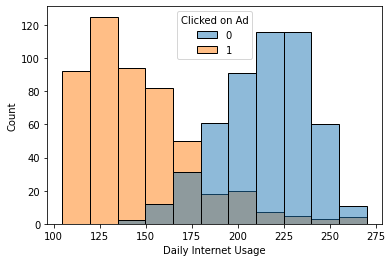

"\n# 'Ad Topic Line' : unique 값이 969/1000 개로 예측에 도움이 안될 수 있다\nsns.countplot(x='Ad Topic Line', hue='Clicked on Ad', data=data)\nplt.show()\n\n# 'City' : unique 값이 1000/1000 개로 예측에 도움이 안될 수 있다\nsns.countplot(x='City', hue='Clicked on Ad', data=data)\nplt.show()\n"

In [ ]:
# Numeric
sns.histplot(x='Daily Time Spent on Site', hue='Clicked on Ad', data=data)
plt.show()

sns.histplot(x='Age',  hue='Clicked on Ad', data=data)
plt.show()

sns.histplot(x='Area Income', hue='Clicked on Ad', data=data)
plt.show()



# Categorical
sns.histplot(x='Daily Internet Usage', hue='Clicked on Ad', data=data)
plt.show()

"""
# 'Ad Topic Line' : unique 값이 969/1000 개로 예측에 도움이 안될 수 있다
sns.countplot(x='Ad Topic Line', hue='Clicked on Ad', data=data)
plt.show()

# 'City' : unique 값이 1000/1000 개로 예측에 도움이 안될 수 있다
sns.countplot(x='City', hue='Clicked on Ad', data=data)
plt.show()
"""

In [ ]:
# Country Drop
data = data.drop(['Country'], axis=1)

# Add New Feture
data['Time_Spent_Band'] = pd.qcut(data['Daily Time Spent on Site'], 4)
data['Age_Band'] = pd.qcut(data['Age'], 5)
data['Area_Income_Band'] = pd.qcut(data['Area Income'], 7)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format=('%m/%d/%Y %H:%M'))
data['Year'] = data['Timestamp'].dt.year
data['Month'] =data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute

data = data.drop('Timestamp', axis=1)


# Categoric -> Numeric
data = pd.get_dummies(data, columns=['Ad Topic Line', 'City'], drop_first=True)
data = pd.get_dummies(data, columns=['Time_Spent_Band', 'Age_Band', 'Area_Income_Band'], drop_first=True)
"""
data['Year'] = pd.DatetimeIndex(data['Timestamp']).year
data['Month'] = pd.DatetimeIndex(data['Timestamp']).month
data['Day'] = pd.DatetimeIndex(data['Timestamp']).day
data['Hour'] = pd.DatetimeIndex(data['Timestamp']).hour
data['Minute'] = pd.DatetimeIndex(data['Timestamp']).minute
"""

"\ndata['Year'] = pd.DatetimeIndex(data['Timestamp']).year\ndata['Month'] = pd.DatetimeIndex(data['Timestamp']).month\ndata['Day'] = pd.DatetimeIndex(data['Timestamp']).day\ndata['Hour'] = pd.DatetimeIndex(data['Timestamp']).hour\ndata['Minute'] = pd.DatetimeIndex(data['Timestamp']).minute\n"

In [ ]:
type(data['Year'][0])

numpy.int64

In [ ]:
data['Year'].value_counts()

2016    1000
Name: Year, dtype: int64

In [ ]:
data['Year'].unique()

array([2016])

In [ ]:
# dataset split
from sklearn.model_selection import train_test_split
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Year,Month,Day,Hour,Minute,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,Ad Topic Line_Advanced 24/7 productivity,Ad Topic Line_Advanced 5thgeneration capability,Ad Topic Line_Advanced didactic conglomeration,Ad Topic Line_Advanced disintermediate data-warehouse,Ad Topic Line_Advanced exuding conglomeration,Ad Topic Line_Advanced full-range migration,Ad Topic Line_Advanced heuristic firmware,Ad Topic Line_Advanced local task-force,Ad Topic Line_Advanced modular Local Area Network,Ad Topic Line_Advanced systemic productivity,Ad Topic Line_Advanced web-enabled standardization,Ad Topic Line_Ameliorated actuating workforce,Ad Topic Line_Ameliorated bandwidth-monitored contingency,Ad Topic Line_Ameliorated client-driven forecast,Ad Topic Line_Ameliorated coherent open architecture,Ad Topic Line_Ameliorated contextually-based collaboration,Ad Topic Line_Ameliorated discrete extranet,Ad Topic Line_Ameliorated exuding encryption,Ad Topic Line_Ameliorated exuding solution,Ad Topic Line_Ameliorated intermediate Graphical User Interface,Ad Topic Line_Ameliorated leadingedge help-desk,Ad Topic Line_Ameliorated local workforce,Ad Topic Line_Ameliorated tangible hierarchy,Ad Topic Line_Ameliorated upward-trending definition,Ad Topic Line_Ameliorated user-facing help-desk,...,City_West Travismouth,City_West Wendyland,City_West William,City_West Zacharyborough,City_Westshire,City_Whiteport,City_Whitneyfort,City_Wilcoxport,City_Williammouth,City_Williamport,City_Williamsborough,City_Williamsfort,City_Williamsmouth,City_Williamsport,City_Williamsside,City_Williamstad,City_Wilsonburgh,City_Wintersfort,City_Wongland,City_Wrightburgh,City_Wrightview,City_Yangside,City_Youngburgh,City_Youngfort,City_Yuton,City_Zacharystad,City_Zacharyton,"Time_Spent_Band_(51.36, 68.215]","Time_Spent_Band_(68.215, 78.548]","Time_Spent_Band_(78.548, 91.43]","Age_Band_(28.0, 33.0]","Age_Band_(33.0, 36.0]","Age_Band_(36.0, 44.0]","Age_Band_(44.0, 61.0]","Area_Income_Band_(39806.844, 48887.127]","Area_Income_Band_(48887.127, 54442.166]","Area_Income_Band_(54442.166, 59669.551]","Area_Income_Band_(59669.551, 63994.789]","Area_Income_Band_(63994.789, 68547.109]","Area_Income_Band_(68547.109, 79484.8]"
675,82.58,38.0,65496.78,225.23,1,2016,3,11,14,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
358,51.38,59.0,42362.49,158.56,0,2016,6,17,17,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
159,75.55,36.0,73234.87,159.24,0,2016,5,9,2,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
533,91.43,35.0,46964.11,209.91,1,2016,7,7,3,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
678,87.85,34.0,51816.27,153.01,0,2016,3,19,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_train)
X_train = pd.DataFrame(minmax.transform(X_train))
X_test = pd.DataFrame(minmax.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
0,0.849567,0.452381,0.786404,0.742464,1.0,0.0,0.333333,0.333333,0.608696,0.847458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.319225,0.952381,0.433146,0.331505,0.0,0.0,0.833333,0.533333,0.739130,0.186441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.730070,0.404762,0.904564,0.335696,0.0,0.0,0.666667,0.266667,0.086957,0.983051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.380952,0.503412,0.648031,1.0,0.0,1.000000,0.200000,0.130435,0.932203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.939147,0.357143,0.577504,0.297294,0.0,0.0,0.333333,0.600000,0.347826,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Model
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, predict)

0.96

In [ ]:
confusion_matrix(y_test, predict)

array([[99,  1],
       [ 7, 93]])